#### Fetal Health prediction-classification analysis 

##### overview 

This analysis aims to predicts fetal health status  to allow Doctors and health care professions to act fast, in low and limited resource settings by identifying mothers with abnormal features on cardiotocogram. 

##### Introduction 
Child and Maternal Health is one of  critical issues facing our country, The UN expects by 2030, countries to end preventable death of Newborns and Under 5 years children. With the aim to reduce to at least as low as 25 per 1000.

Parallel to child mortality, also there is ** maternal mortality in 2017 accounted for 295000 **, and 94% of these occured in LMICs, in which most can be Prevented. 

Cardiotocogram is small cost effective tool that use ultrasound waves to assess both fetal and maternal health, allowing healthcare professionals to take action immediately 

##### Problem statement 

CTG even though it is a cost effective tool and widely available, still requires experience to intepret and detect early abnormalities which may not be available in all healthcare settings. 
to address this problem, we develop a machine learning model  to classify CTG reading into  Normal, suspect and pathological. 



##### DATA Description 

Source : [text](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)

- recordings : 2126 and 22 variables 
- This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

1. Normal : 1
2. Suspect : 2
3. Pathological : 3


In [130]:
# import the necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import time
import warnings


# Define a three-color palette: blue, orange, green
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']  # blue, orange, green

# Set as default for seaborn
sns.set_palette(custom_palette)

# Set as default for matplotlib
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)

warnings.filterwarnings('ignore')



### DATA EXPLORATION 

In [131]:
#import the dataframe 

df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [132]:
df.shape

(2126, 22)

### key features: 

1. baseline value - FHR baseline (beats per minute)
2. accelerations - Number of accelerations per second
3. fetal_movement - Number of fetal movements per second
4. uterine_contractions - Number of uterine contractions per second
5. light_decelerations- Number of light decelerations per second
6. severe_decelerations- Number of severe decelerations per second
7. prolongued_decelerations- Number of prolonged decelerations per second
8. abnormal_short_term_variability - Percentage of time with abnormal short term variability
9. mean_value_of_short_term_variability  - Mean value of short term variability
10. percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long term variability
11. mean_value_of_long_term_variability - Mean value of long term variability
12. histogram_width - Width of FHR histogram
13. histogram_min - Minimum (low frequency) of FHR histogram
14. histogram_max - Maximum (high frequency) of FHR histogram
15. histogram_number_of_peaks - Number of histogram peaks
16. histogram_number_of_zeroes - Number of histogram zeros
17. histogram_mode - Histogram mode
18. histogram_mean - Histogram mean
19. histogram_median - Histogram median
20. histogram_variance - Histogram variance
21. histogram_tendency - Histogram tendency

In [133]:
# any absent or null values 
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [134]:
#explore if there are any duplicates 
df.duplicated().sum()


np.int64(13)

In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


#### observation:


- there are 22 variables 
- no missing values 
- there are 13 duplicates 
- there are currently 2126 entries 

In [136]:
#drop duplicate values 
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

np.int64(0)

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64


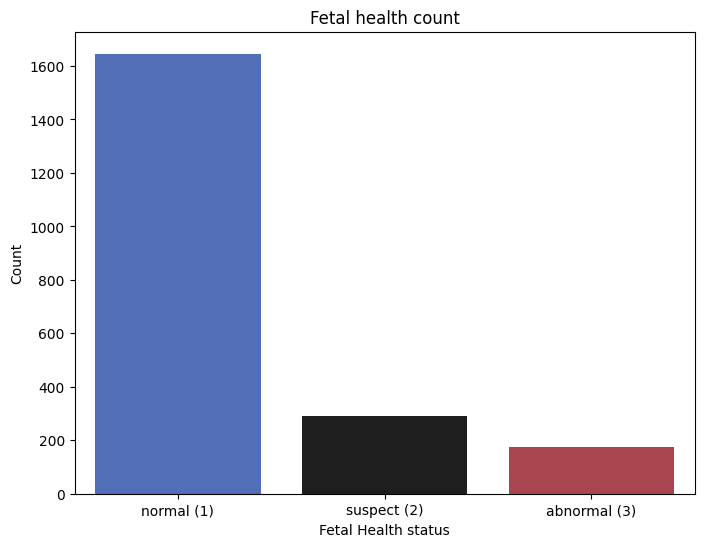

In [137]:
#value counts 
fetal_health_count = df['fetal_health'].value_counts()
print(fetal_health_count)


#visualise the counts of class labels 


fetal_health_count.index = ["normal (1)", "suspect (2)", "abnormal (3)"]
plt.figure(figsize=(8,6))
sns.barplot(x=fetal_health_count.index, y=fetal_health_count.values, palette='icefire')
plt.xlabel('Fetal Health status')
plt.ylabel('Count')
plt.title('Fetal health count')
plt.show()


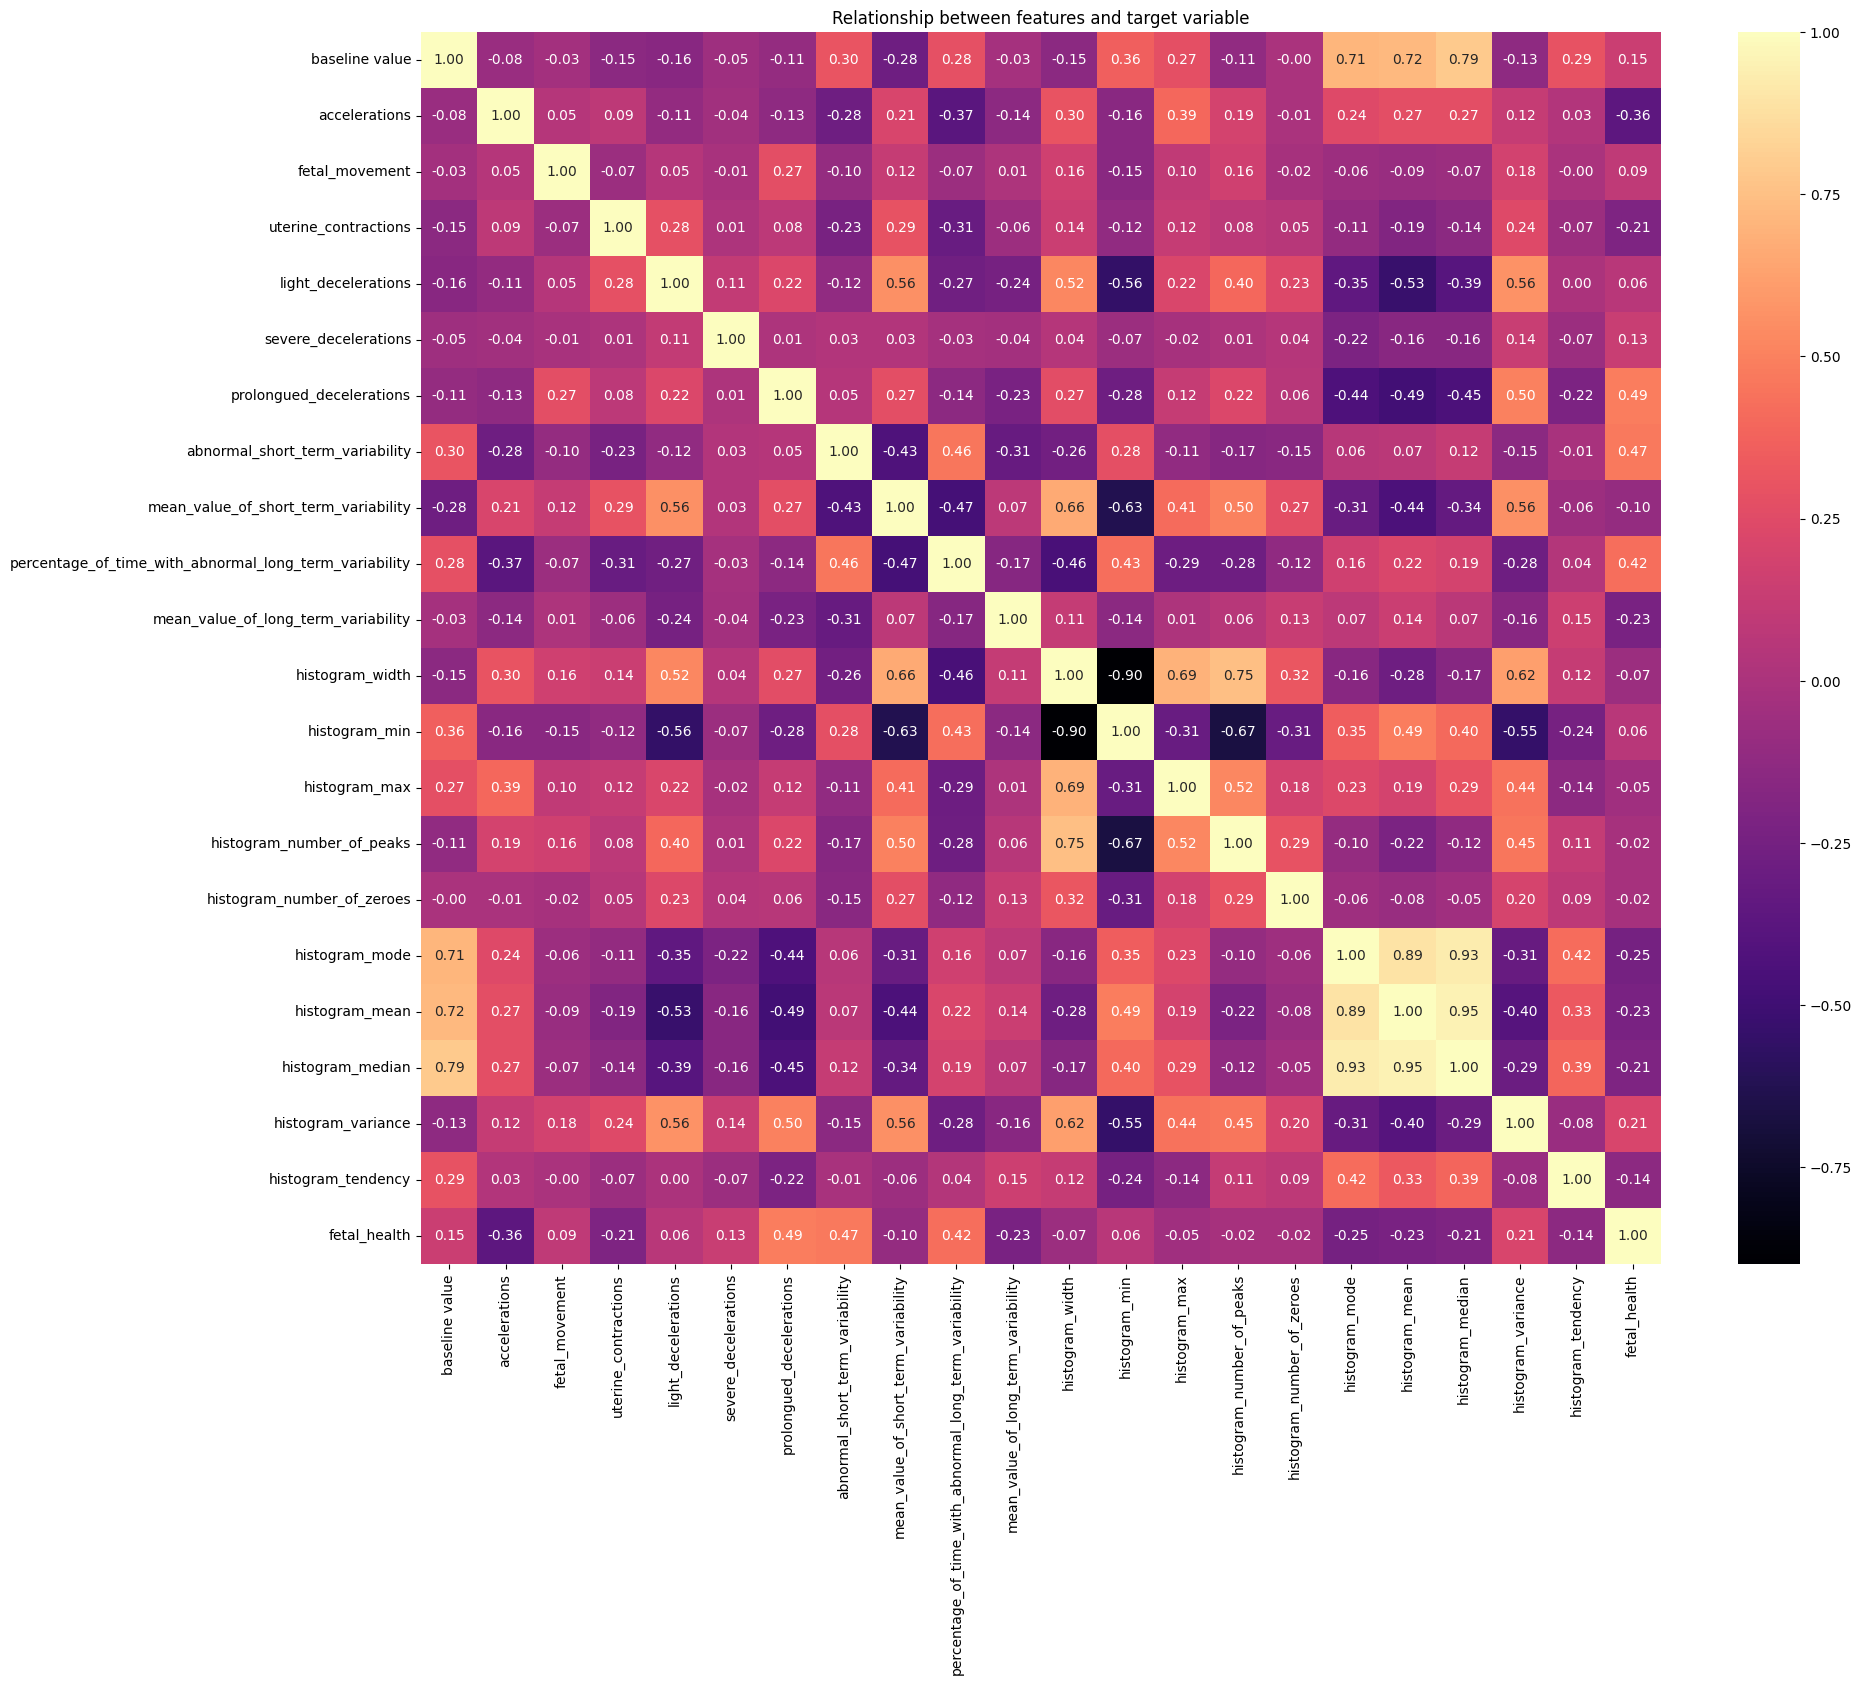

In [138]:
# visualise the relationship between data process 
plt.figure(figsize=(20, 16))

corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap='magma', annot=True, fmt='.2f')
plt.title('Relationship between features and target variable')
plt.show()

#### observations: 

##### Strong Positive Correlations (>0.7):
- Features derived from histograms—histogram_mode, histogram_mean, and histogram_median—exhibit very strong intercorrelations, ranging between 0.89 and 0.95.

- These histogram metrics are also strongly correlated with baseline_value (correlation coefficients between 0.71 and 0.79), indicating potential feature redundancy within the histogram group.

##### Moderate to Strong Correlations with Fetal Health:
- Prolonged_decelerations (correlation: 0.49),

- Abnormal_short_term_variability (correlation: 0.47), and

- Percentage_of_time_with_abnormal_long_term_variability (correlation: 0.42)
all show moderate positive correlations with deteriorating fetal health, suggesting their potential relevance in predicting adverse outcomes.

##### Weak Correlations:
- Fetal_movement exhibits only weak associations with most other variables.

- Severe_decelerations shows unexpectedly low correlation with the remaining features.

- Histogram_number_of_zeroes has consistently weak correlations with other metrics.



#### Data preprocessing: 

##### Remove Leaky Features: 

in the present when we are going to read an ECG : 
1. fetal movements 
2. baseline fetal heart rate 
3. accelerations 
4. light decelerations 
5. uterine contractions 

leaky features : 
1. severe decelerations 
2. prolonged decelerations 

features used in statistical analysis to assess variability are not readily available on common CTG there will not be used too. 

In [139]:

# data processing 

def wrangle(data):
    
    #lets remove data they may contribute to data leakage 
    data.drop(columns=['severe_decelerations','prolongued_decelerations'], inplace=True)
    
    #drop features that were done in calculations for variable analysis by selecting features in real world case scenarion
    data = data[['baseline value', 'accelerations', 'fetal_movement', 'light_decelerations','uterine_contractions', 'fetal_health']]
    
    return data



In [140]:
#experimentation
df1 = wrangle(df)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2125
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   baseline value        2113 non-null   float64
 1   accelerations         2113 non-null   float64
 2   fetal_movement        2113 non-null   float64
 3   light_decelerations   2113 non-null   float64
 4   uterine_contractions  2113 non-null   float64
 5   fetal_health          2113 non-null   float64
dtypes: float64(6)
memory usage: 115.6 KB


<Figure size 2000x1600 with 0 Axes>

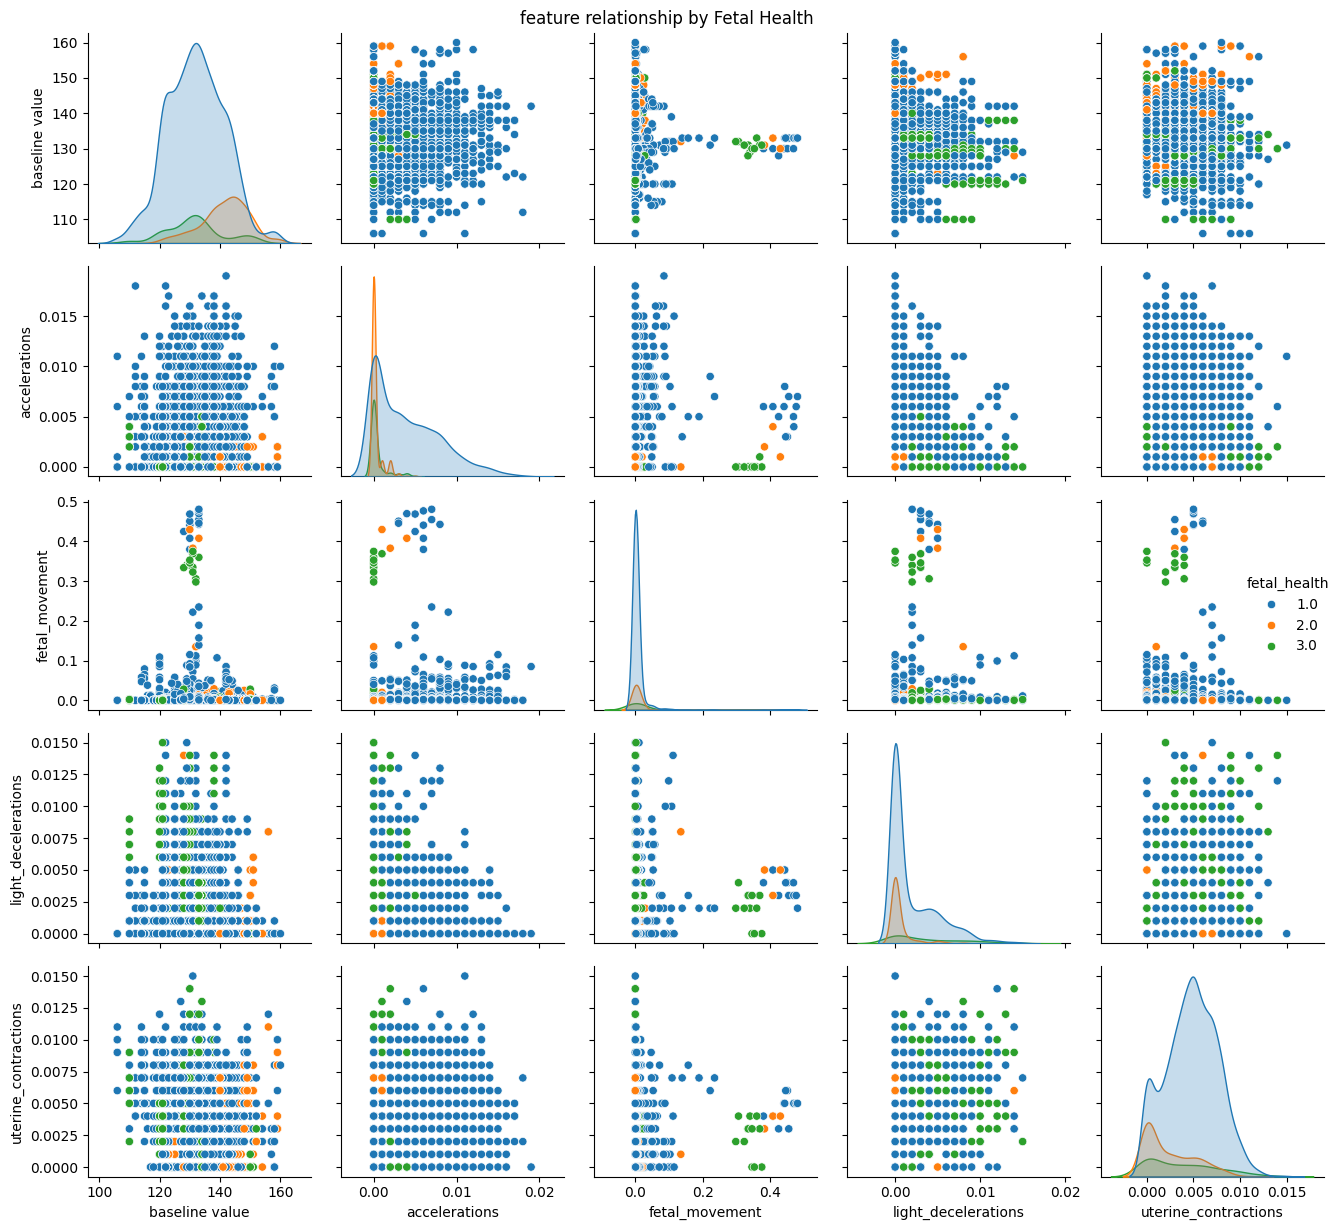

In [142]:
#explore the patterns within our dataset with selected features 
plt.figure(figsize=(20,16))
sns.pairplot(df1, hue='fetal_health', palette=custom_palette)
plt.suptitle('feature relationship by Fetal Health')
plt.tight_layout()
plt.show()

In [144]:
#summarise statistics 

category = df1.groupby('fetal_health').mean()
category.T

fetal_health,1.0,2.0,3.0
baseline value,131.998177,141.650685,131.668571
accelerations,0.004002,0.000277,0.000394
fetal_movement,0.008002,0.008284,0.025823
light_decelerations,0.001952,0.000541,0.003691
uterine_contractions,0.004801,0.002404,0.003806


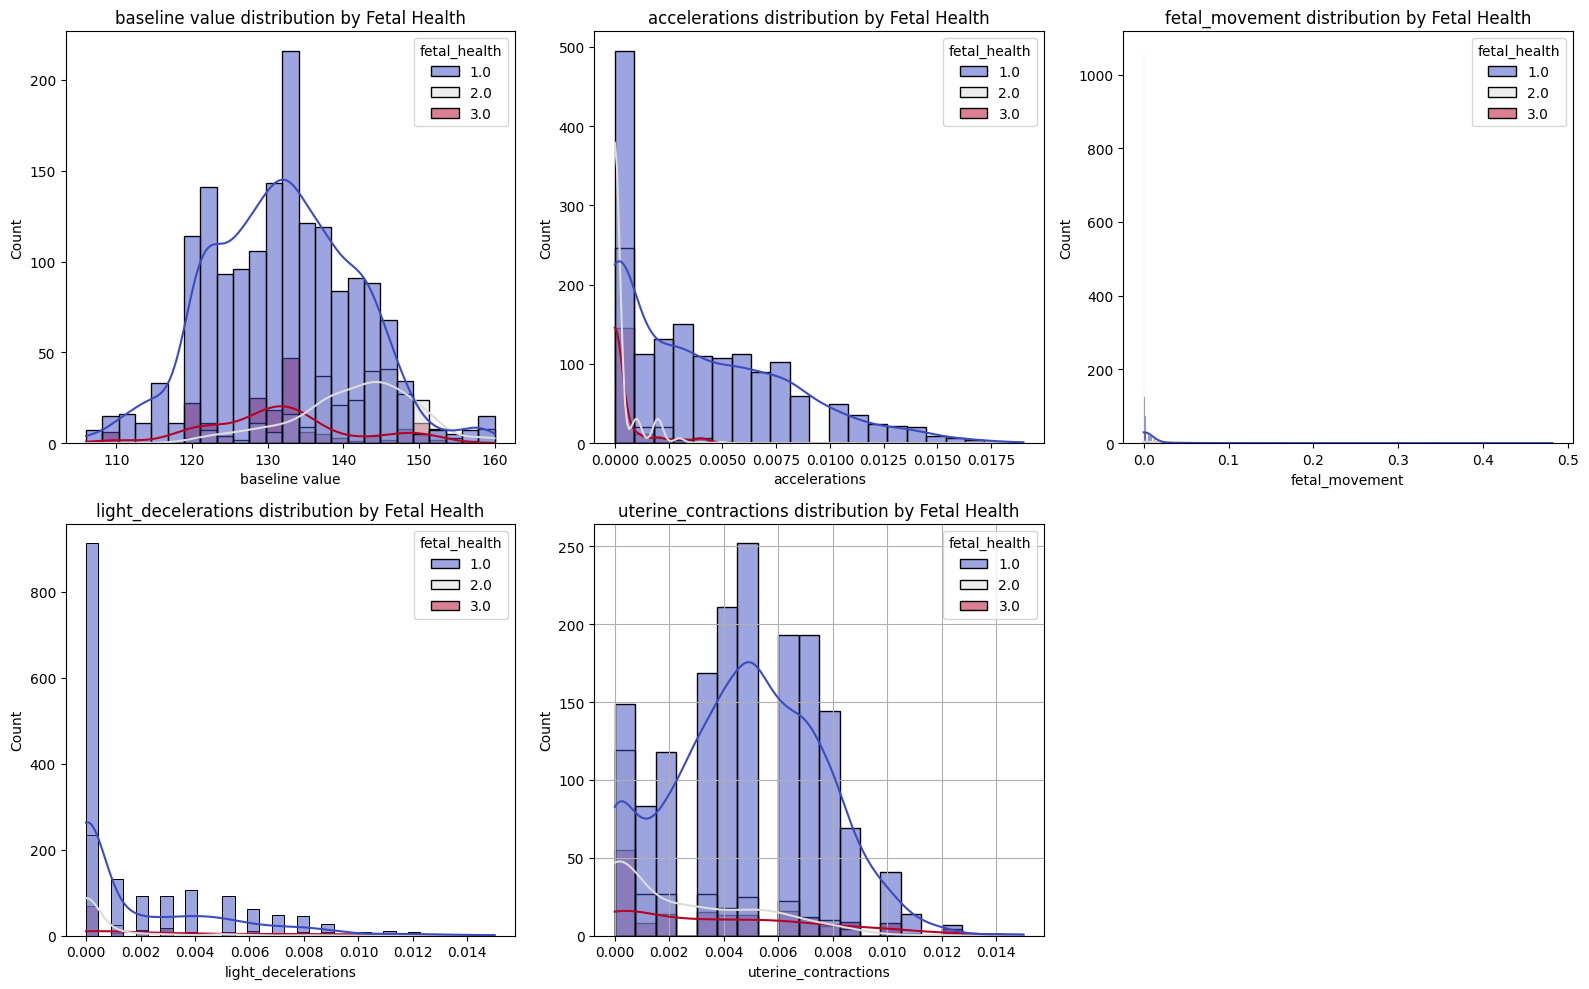

In [146]:
# Explore the distribution for each feature by fetal health status
features = df1.drop(columns='fetal_health').columns

plt.figure(figsize=(16, 10))

for i, name in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df1, x=name, hue='fetal_health', kde=True, palette='coolwarm')
    plt.title(f'{name} distribution by Fetal Health')
plt.tight_layout()
plt.grid(True)
plt.show()





#### Feature Preprocessing

In [148]:


#split features and target variables 
X = df1.drop(columns='fetal_health')
y = df1.fetal_health

#split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#lets normalize the features 
scaler = StandardScaler()
XT_train = scaler.fit_transform(X_train)
XT_test = scaler.transform(X_test)

print(f'X_train shape: {XT_train.shape}')
print(f'Y train shape: {y_train.shape}')



X_train shape: (1690, 5)
Y train shape: (1690,)


#### Model Training and evaluation 

In [149]:
# instantiate multiple models


models = {
    'Logistic regression': LogisticRegression(multi_class='multinomial'),
    'random forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    print(f'Model Training : {name}.......... ')
    start_time = time.time()
    model.fit(XT_train, y_train)
    y_pred_train = model.predict(XT_train)
    y_pred_test = model.predict(XT_test)
    duration = time.time() - start_time

    print(f'\ntraining complete for {name} duration : {duration}')

    #evaluating the model 
    print(f'class report on training set : {name}')

    class_report_train = classification_report(y_train, y_pred_train)
    print(f'\n{class_report_train}')

    print(f'class report on testing set : {name}')
    class_report_test = classification_report(y_test, y_pred_test)

    print(f'\n{class_report_test}')
    


Model Training : Logistic regression.......... 

training complete for Logistic regression duration : 0.04772043228149414
class report on training set : Logistic regression

              precision    recall  f1-score   support

         1.0       0.85      0.95      0.90      1305
         2.0       0.60      0.53      0.57       238
         3.0       0.55      0.07      0.13       147

    accuracy                           0.82      1690
   macro avg       0.67      0.52      0.53      1690
weighted avg       0.79      0.82      0.79      1690

class report on testing set : Logistic regression

              precision    recall  f1-score   support

         1.0       0.87      0.95      0.91       341
         2.0       0.62      0.48      0.54        54
         3.0       0.44      0.14      0.22        28

    accuracy                           0.84       423
   macro avg       0.64      0.52      0.56       423
weighted avg       0.81      0.84      0.82       423

Model Trainin

## 2. Data Distribution Insight

- **Total Samples**:  
  - Training: 1690  
  - Testing: 423  

- **Class Distribution**:  
  - Class 1: Majority class  
  - Class 2: Minority class  
  - Class 3: Least frequent class  

- **Imbalance Impact**:  
  Accuracy is misleading in imbalanced datasets. Hence, macro and weighted **F1-score**, **precision**, and **recall** are better evaluation metrics than accuracy.

## 5. Overfitting Analysis

- **Random Forest**:
  - High performance on both train and test sets.
  - Low risk of overfitting.
  
- **Logistic Regression** and **KNN**:
  - Noticeable drop from training to testing performance.
  - Possible underfitting, especially in Logistic Regression for minority classes.

In [151]:
#from the assessment you could see Random forest does perform better 

#we are going to use a grid search cv to check the best parameters that will improve our model better 

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10],
    'min_samples_split': [1,2,5],
    
}

#instantiate the grid search 
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)


#fit to the training data 
grid_search.fit(XT_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_weighted')

In [152]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8678721417680462


In [153]:
#lets see the performance 

train_predictions = grid_search.predict(XT_train)
test_predictions = grid_search.predict(XT_test)

# print a classification report 

train_report = classification_report(y_train, train_predictions)
test_report = classification_report(y_test, test_predictions)

#print the train classification report 
print(f'Train classification report :\n{train_report}')

#print the test classification report:
print(f'test classification report:\n{test_report}')


Train classification report :
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97      1305
         2.0       0.88      0.82      0.85       238
         3.0       0.98      0.84      0.90       147

    accuracy                           0.95      1690
   macro avg       0.94      0.88      0.91      1690
weighted avg       0.95      0.95      0.95      1690

test classification report:
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       341
         2.0       0.62      0.57      0.60        54
         3.0       0.76      0.68      0.72        28

    accuracy                           0.88       423
   macro avg       0.77      0.73      0.75       423
weighted avg       0.88      0.88      0.88       423



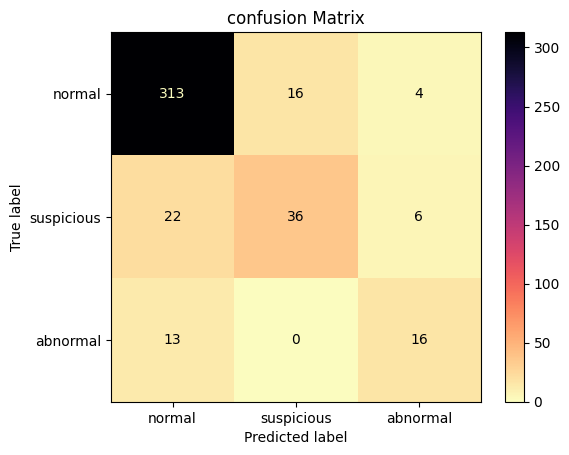

In [ ]:
#print the confusion matrix: 
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, display_labels=['normal', 'suspicious', 'abnormal'], cmap='magma_r')
plt.title('confusion Matrix')
plt.show()